


Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.
Epoch 1/10


30/30 [==============================] - 458s 14s/step - loss: 1.0910 - accuracy: 0.4256 - val_loss: 1.0775 - val_accuracy: 0.4375
Epoch 2/10
30/30 [==============================] - 410s 14s/step - loss: 1.0858 - accuracy: 0.4256 - val_loss: 1.0808 - val_accuracy: 0.4313
Epoch 3/10
30/30 [==============================] - 407s 14s/step - loss: 1.0784 - accuracy: 0.4298 - val_loss: 1.0854 - val_accuracy: 0.4125
Epoch 4/10
30/30 [==============================] - 409s 14s/step - loss: 1.0811 - accuracy: 0.4277 - val_loss: 1.0841 - val_accuracy: 0.4313
Epoch 5/10
30/30 [==============================] - 408s 14s/step - loss: 1.0852 - accuracy: 0.4308 - val_loss: 1.0759 - val_accuracy: 0.4375
Epoch 6/10
30/30 [==============================] - 407s 14s/step - loss: 1.0799 - accuracy: 0.4266 - val_loss: 1.0770 - val_accuracy: 0.4375
Epoch 7/10
30/30 [==============================] - 409s 14s/

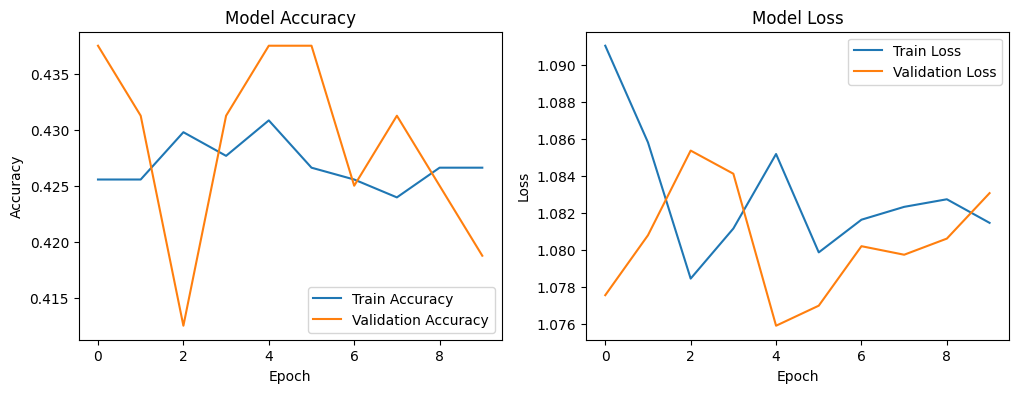

INFO:tensorflow:Assets written to: data2a/vgg16_damage_location\assets


INFO:tensorflow:Assets written to: data2a/vgg16_damage_location\assets
C:\Users\saura\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to data2a/vgg16_damage_location (TensorFlow SavedModel format) and data2a/vgg16_damage_location.h5 (HDF5 format)
6/6 [==============================] - 15s 2s/step


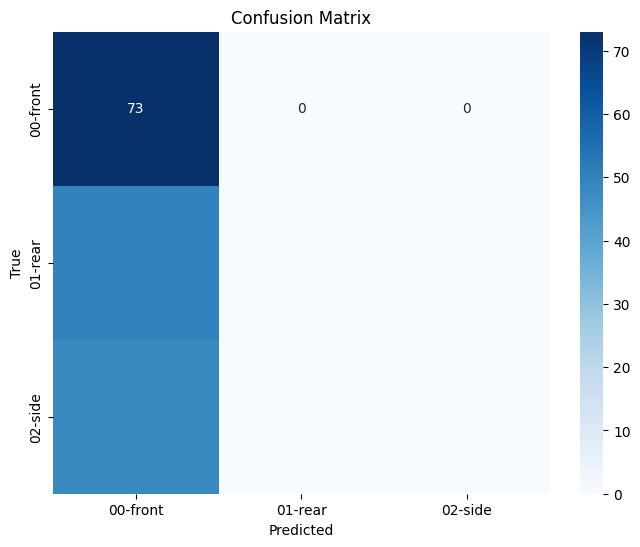

              precision    recall  f1-score   support

    00-front       0.43      1.00      0.60        73
     01-rear       0.00      0.00      0.00        50
     02-side       0.00      0.00      0.00        48

    accuracy                           0.43       171
   macro avg       0.14      0.33      0.20       171
weighted avg       0.18      0.43      0.26       171



C:\Users\saura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import ZeroPadding2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
EPOCHS = 10
TRAIN_DIR = 'data2a/training'
VAL_DIR = 'data2a/validation'
MODEL_SAVE_PATH = 'data2a/vgg16_damage_location'  # Directory for saving the model

# Load and build a VGG16-like model
def build_vgg16(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)):
    model = Sequential()
    
    # VGG16-like layers
    model.add(ZeroPadding2D((1, 1), input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully connected layers for classification
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))  # 3 classes: front, rear, side

    return model

# Compile the model
model = build_vgg16()
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# Data loading
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, target_size=(IMG_WIDTH, IMG_HEIGHT), 
                                                    batch_size=BATCH_SIZE, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(VAL_DIR, target_size=(IMG_WIDTH, IMG_HEIGHT), 
                                                batch_size=BATCH_SIZE, class_mode='categorical')

# Training the model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // BATCH_SIZE, epochs=EPOCHS,
                    validation_data=val_generator, validation_steps=val_generator.samples // BATCH_SIZE)

# Plotting training metrics
def plot_metrics(history):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(history)

# Save the model
model.save(MODEL_SAVE_PATH, save_format='tf')
model.save(f"{MODEL_SAVE_PATH}.h5")

print(f"Model saved to {MODEL_SAVE_PATH} (TensorFlow SavedModel format) and {MODEL_SAVE_PATH}.h5 (HDF5 format)")

# Evaluate the model
def evaluate_model(model, val_generator):
    val_generator.reset()
    Y_pred = model.predict(val_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = val_generator.classes
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(),
                yticklabels=val_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

evaluate_model(model, val_generator)
